# Dimension Reduction

## Boston Housing Dataset
- https://www.kaggle.com/c/boston-housing/
- https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [1]:
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

print('numpy.__version__', np.__version__)
print('pandas.__version__', pd.__version__)
print('sns.__version__', sns.__version__)

Using TensorFlow backend.


numpy.__version__ 1.15.1
pandas.__version__ 0.23.4
sns.__version__ 0.9.0


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
columns = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town.',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per $10,000',
    'PTRATIO': 'pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000\'s',
}
features = list(columns.keys())[:-1]
print('features', features)

features ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [4]:
x_train_pd = pd.DataFrame(x_train, columns=features)
x_train_pd.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79
403,0.01439,60.0,2.93,0.0,0.4010,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38


## Null elements
Dataset of Boston houses doesn't have null elements

In [5]:
x_train_pd.isnull().sum()/len(x_train_pd) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

## Variance

In [6]:
x_train_pd.var()

CRIM          85.391172
ZN           564.904073
INDUS         46.393911
CHAS           0.058196
NOX            0.013758
RM             0.503798
AGE          780.680755
DIS            4.121772
RAD           75.661475
TAX        27680.488435
PTRATIO        4.841680
B           8856.908142
LSTAT         52.628420
dtype: float64

## Correlation


In [7]:
x_train_pd.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.192179,0.397419,-0.050828,0.405765,-0.217597,0.344410,-0.378590,0.609689,0.575652,0.273447,-0.390613,0.434384
ZN,-0.192179,1.000000,-0.533823,-0.041981,-0.521713,0.338683,-0.578728,0.650787,-0.311091,-0.303522,-0.403139,0.176006,-0.415237
INDUS,0.397419,-0.533823,1.000000,0.052839,0.774200,-0.409924,0.656350,-0.725155,0.599226,0.701362,0.379284,-0.372885,0.603129
CHAS,-0.050828,-0.041981,0.052839,1.000000,0.079803,0.040431,0.080488,-0.083101,-0.024851,-0.051343,-0.122008,0.037832,-0.011017
NOX,0.405765,-0.521713,0.774200,0.079803,1.000000,-0.335866,0.729338,-0.777062,0.616535,0.673471,0.188160,-0.409479,0.592994
RM,-0.217597,0.338683,-0.409924,0.040431,-0.335866,1.000000,-0.240875,0.233970,-0.243990,-0.307904,-0.367256,0.145525,-0.610844
AGE,0.344410,-0.578728,0.656350,0.080488,0.729338,-0.240875,1.000000,-0.766670,0.462188,0.512746,0.282193,-0.278403,0.590898
DIS,-0.378590,0.650787,-0.725155,-0.083101,-0.777062,0.233970,-0.766670,1.000000,-0.511179,-0.543668,-0.243067,0.295995,-0.507075
RAD,0.609689,-0.311091,0.599226,-0.024851,0.616535,-0.243990,0.462188,-0.511179,1.000000,0.922676,0.449908,-0.478245,0.490250
TAX,0.575652,-0.303522,0.701362,-0.051343,0.673471,-0.307904,0.512746,-0.543668,0.922676,1.000000,0.440499,-0.471777,0.534752


## Random Forest
use random forest to detect and extract 2 the most important features

In [8]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(x_train_pd, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

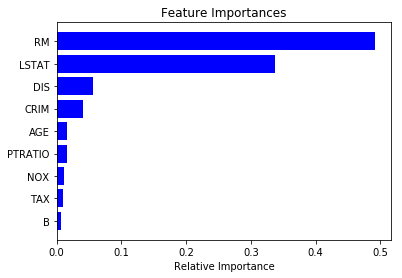

In [9]:
importances = model.feature_importances_
importance_indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(importance_indices)), importances[importance_indices], color='b', align='center')
plt.yticks(range(len(importance_indices)), [features[i] for i in importance_indices])
plt.xlabel('Relative Importance')
plt.show()

Select 2 the most important features

In [10]:
feature = SelectFromModel(model)
important_features = feature.fit_transform(x_train_pd, y_train)

feature_x = features[importance_indices[-1]]
feature_y = features[importance_indices[-2]]

fit_to_2d = np.hstack((important_features, np.expand_dims(y_train, axis=1)))
fit_to_2d_pd = pd.DataFrame(fit_to_2d, columns=[feature_x, feature_y, 'cost'])
fit_to_2d_pd.tail()

,RM,LSTAT,cost
399,5.602,16.20,19.4
400,6.240,6.59,25.2
401,6.031,7.83,19.4
402,5.709,15.79,19.4
403,6.604,4.38,29.1


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


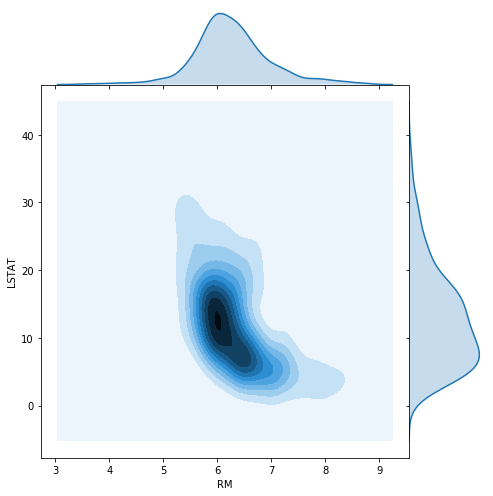

In [11]:
g = sns.jointplot(x=feature_x, y=feature_y, data=fit_to_2d_pd, kind="kde", height=7, space=0)

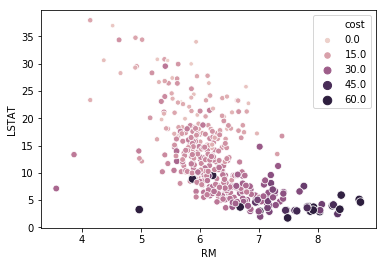

In [12]:
sns.scatterplot(x=feature_x, y=feature_y,
                size='cost', hue="cost", 
                data=fit_to_2d_pd)